In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
#READ DATA 
df1 = pd.read_csv('AirPassengers.csv')

In [28]:
#Checking data types
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [23]:
#telling pandas that we are working with time series. Changing format of data to time series.

In [42]:
df1 = pd.read_csv('AirPassengers.csv', parse_dates = ['Year-Month'])

In [38]:
df1.dtypes

Month    datetime64[ns]
Pax               int64
dtype: object

In [39]:
#we always recommend that we make index of the time series to reduce the additional column of index

In [47]:
df1 = pd.read_csv('Airpassengers.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')
# we have turned time as index here. This was we can also easily do slicing, that is obtain data for a specific time.

In [49]:
df1['1951-04-01':'1952-03-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [50]:
#Similarly, if we need to extract a specific data point we will not mention entire range, just the index.

In [51]:
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

In [52]:
#plot the time series.

<AxesSubplot:xlabel='Year-Month'>

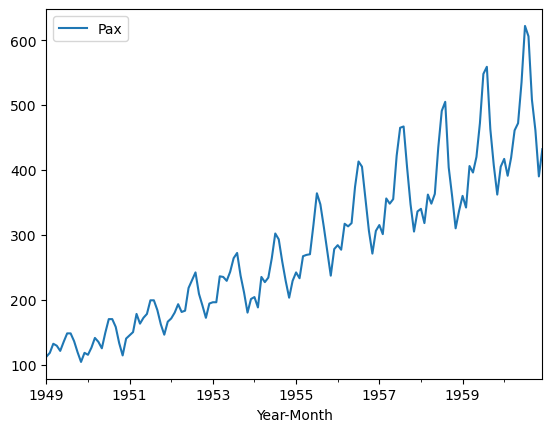

In [53]:
df1.plot()

In [55]:
plt.show()

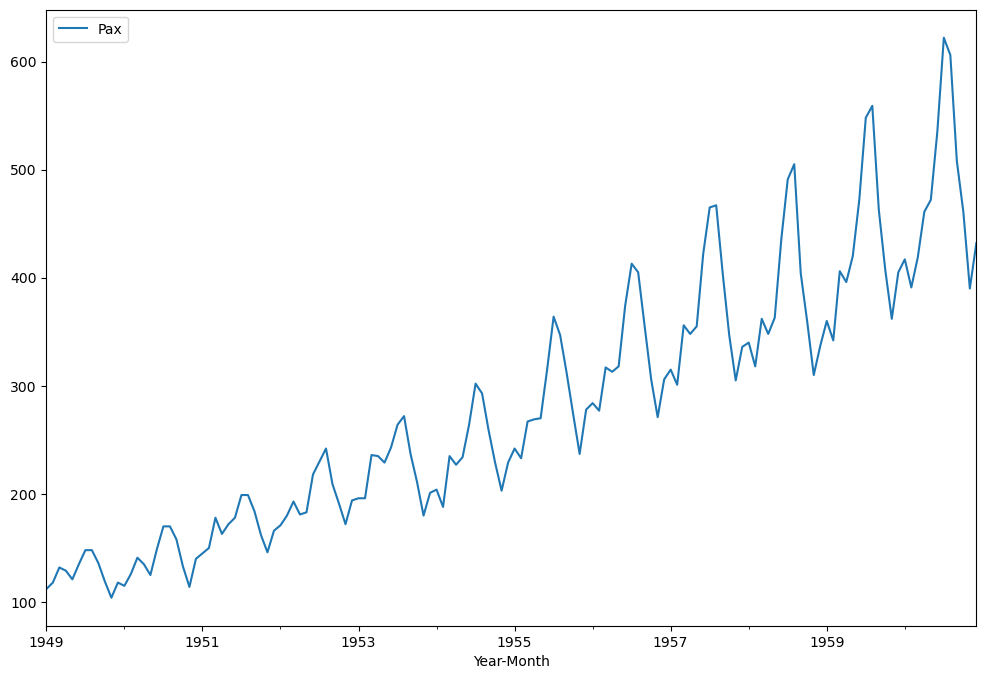

In [61]:
#Increase he figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df1.plot()
plt.show()

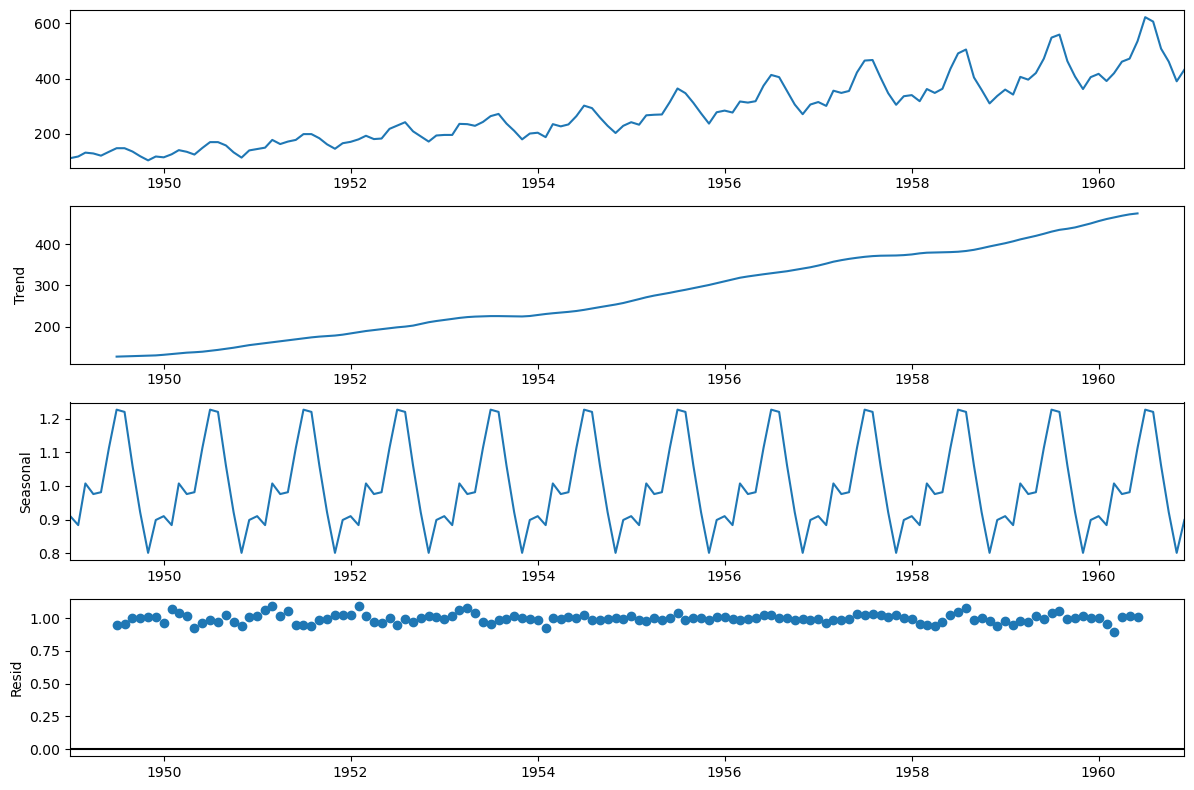

In [67]:
#decompose the time series ultiplicatively. 
df1_mul_decompose = seasonal_decompose(df1,model = 'multiplicative')
df1_mul_decompose.plot()
plt.show()

In [70]:
#lets try to do log transformation.
df1_log = df1.copy()
df1_log['pax'] = np.log(df1)
df1_log.Pax

Year-Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Pax, Length: 144, dtype: int64

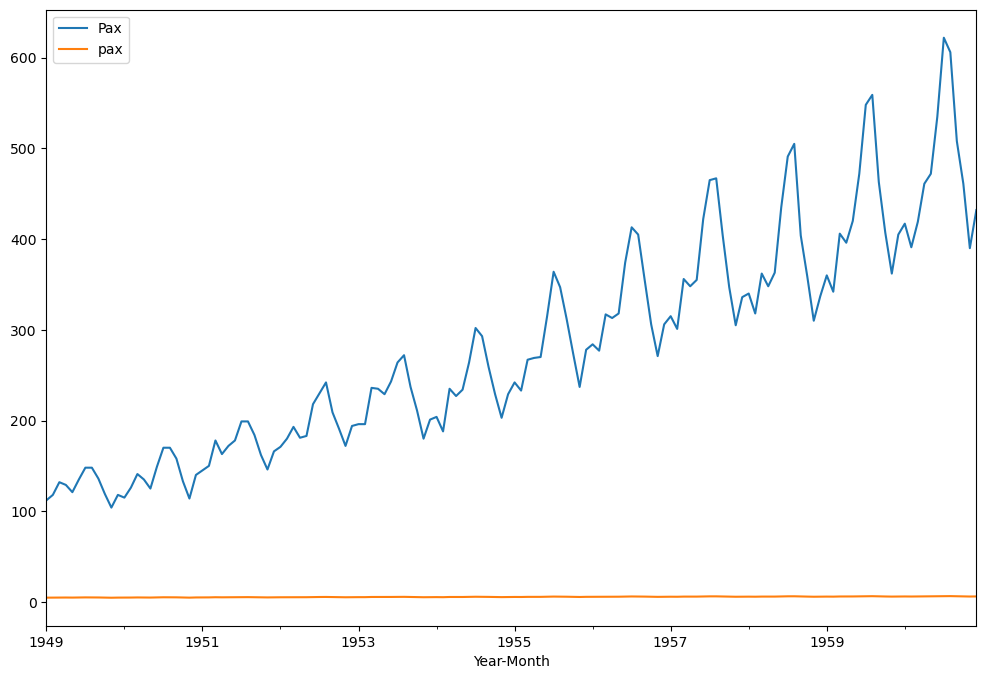

In [72]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

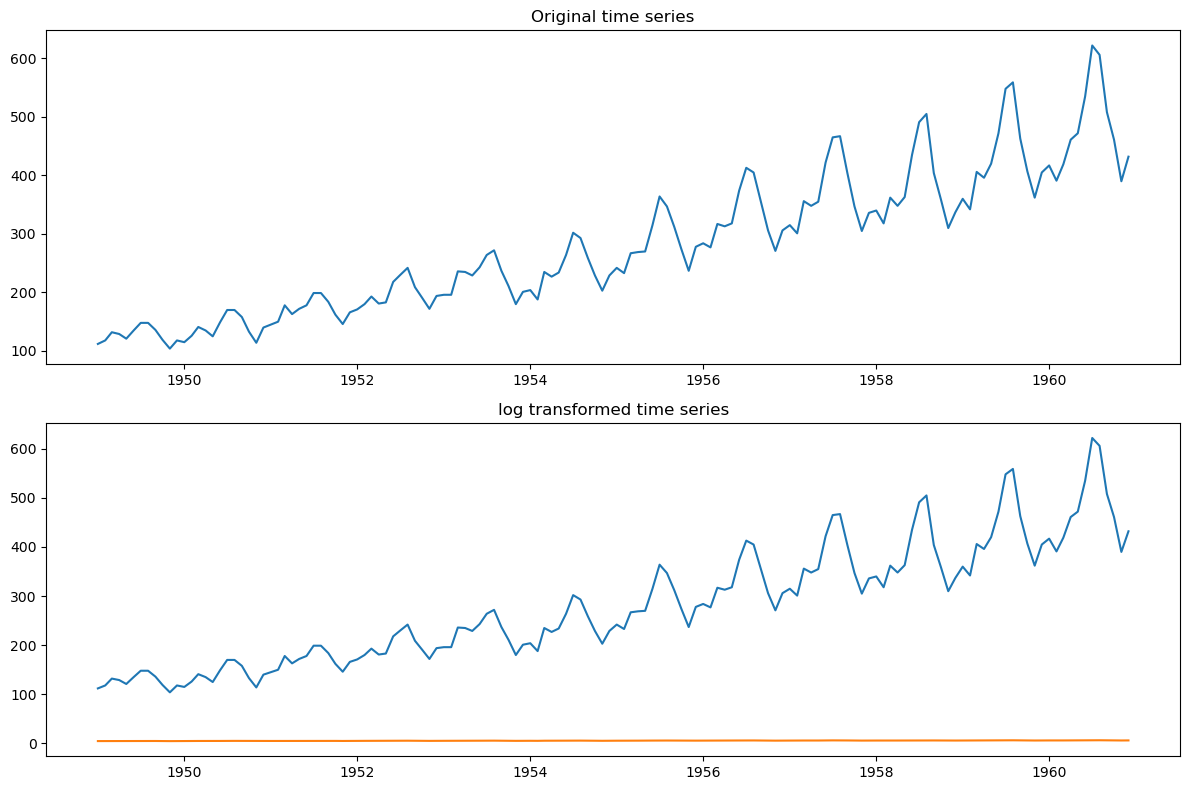

In [74]:
# compare with the original series.
plt.subplot(2,1,1)
plt.title('Original time series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('log transformed time series')
plt.plot(df1_log)
plt.tight_layout()